In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [43]:

data = pd.read_csv("DATA_monkey_pox_encoded.csv")

# Initialize LabelEncoder
le = LabelEncoder()

# Encode True/False to 0/1
# Assuming these are represented as strings '0' and '1' in the CSV
# If they are actual booleans, this step is unnecessary.
for col in ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']:
    data[col] = le.fit_transform(data[col].astype(str))

# Encode Negative/Positive to 4/5
data['MonkeyPox'] = data['MonkeyPox'].replace({'Negative': 4, 'Positive': 5})

# Encode Systemic Illness values
data['Systemic Illness'] = data['Systemic Illness'].replace({'None': 6, 'Fever': 7, 'Swollen Lymph Nodes': 8, 'Muscle Aches and Pain': 9})
# Fill NaN values with a placeholder (e.g., 6 for 'None') if needed
data['Systemic Illness'] = data['Systemic Illness'].fillna(6)

print(data.head(10))


  Patient_ID  Systemic Illness  Rectal Pain  Sore Throat  Penile Oedema  \
0         P0               6.0            0            1              1   
1         P1               7.0            1            0              1   
2         P2               7.0            0            1              1   
3         P3               6.0            1            0              0   
4         P4               8.0            1            1              1   
5         P5               8.0            0            1              0   
6         P6               7.0            0            1              0   
7         P7               7.0            1            1              0   
8         P8               9.0            0            1              1   
9         P9               7.0            0            0              1   

   Oral Lesions  Solitary Lesion  Swollen Tonsils  HIV Infection  \
0             1                0                1              0   
1             1                0      

C:\Users\MSI\AppData\Local\Temp\ipykernel_13828\2848041321.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MonkeyPox'] = data['MonkeyPox'].replace({'Negative': 4, 'Positive': 5})
C:\Users\MSI\AppData\Local\Temp\ipykernel_13828\2848041321.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Systemic Illness'] = data['Systemic Illness'].replace({'None': 6, 'Fever': 7, 'Swollen Lymph Nodes': 8, 'Muscle Aches and Pain': 9})


In [44]:
X=np.asarray(data[["Systemic Illness" ,"Rectal Pain" ,"Sore Throat","Penile Oedema","Oral Lesions","Solitary Lesion","Swollen Tonsils","HIV Infection","Sexually Transmitted Infection"]])
Y=np.asarray(data[["MonkeyPox"]])
print(X[0:5])
print(Y[0:5])

[[6. 0. 1. 1. 1. 0. 1. 0. 0.]
 [7. 1. 0. 1. 1. 0. 0. 1. 0.]
 [7. 0. 1. 1. 0. 0. 0. 1. 0.]
 [6. 1. 0. 0. 0. 1. 1. 1. 0.]
 [8. 1. 1. 1. 0. 0. 1. 1. 0.]]
[[4]
 [5]
 [5]
 [5]
 [5]]


In [50]:
data.shape
data["MonkeyPox"].value_counts()
data.hist
data.head(10)
data.describe()
data.dtypes
data["Systemic Illness"] = data["Systemic Illness"].astype("int")

In [51]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[-1.34156154 -0.98767594  0.99568929 ...  0.99736348 -1.00674273
  -0.99568929]
 [-0.4432586   1.01247784 -1.00432937 ... -1.00264349  0.99330243
  -0.99568929]
 [-0.4432586  -0.98767594  0.99568929 ... -1.00264349  0.99330243
  -0.99568929]
 ...
 [-1.34156154  1.01247784  0.99568929 ...  0.99736348 -1.00674273
  -0.99568929]
 [ 0.45504434 -0.98767594  0.99568929 ...  0.99736348 -1.00674273
  -0.99568929]
 [ 0.45504434 -0.98767594 -1.00432937 ...  0.99736348  0.99330243
  -0.99568929]]


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [61]:
from sklearn import svm
clf = svm.SVC(kernel="rbf")
clf.fit(X_train , y_train)

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [71]:
yhat=clf.predict(X_test)
yhat [0:5]

array([5, 5, 5, 5, 5], dtype=int64)

In [77]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test ,yhat , pos_label=5 )

0.661106590724166

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[4,5]))

[[ 876 2075]
 [ 424 4875]]


              precision    recall  f1-score   support

           4       0.67      0.30      0.41      2951
           5       0.70      0.92      0.80      5299

    accuracy                           0.70      8250
   macro avg       0.69      0.61      0.60      8250
weighted avg       0.69      0.70      0.66      8250

Confusion matrix, without normalization
[[ 876 2075]
 [ 424 4875]]


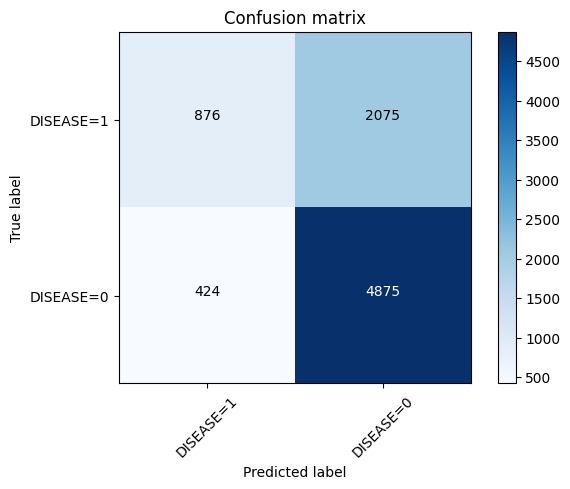

In [88]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[4,5])
np.set_printoptions(precision=2)
print(classification_report(y_test , yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['DISEASE=1','DISEASE=0'],normalize= False,  title='Confusion matrix')

0.6586831432376464